In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

from scipy.stats import mannwhitneyu

Blocks

In [11]:
gda_blocks = pd.read_csv("block_sizes_gdansk.csv")
cph_blocks = pd.read_csv("block_sizes_copenhagen.csv")

# Add labels
cph_blocks["city"] = "Copenhagen"
gda_blocks["city"] = "Gdańsk"

# Combine
blocks_all = pd.concat([gda_blocks, cph_blocks])

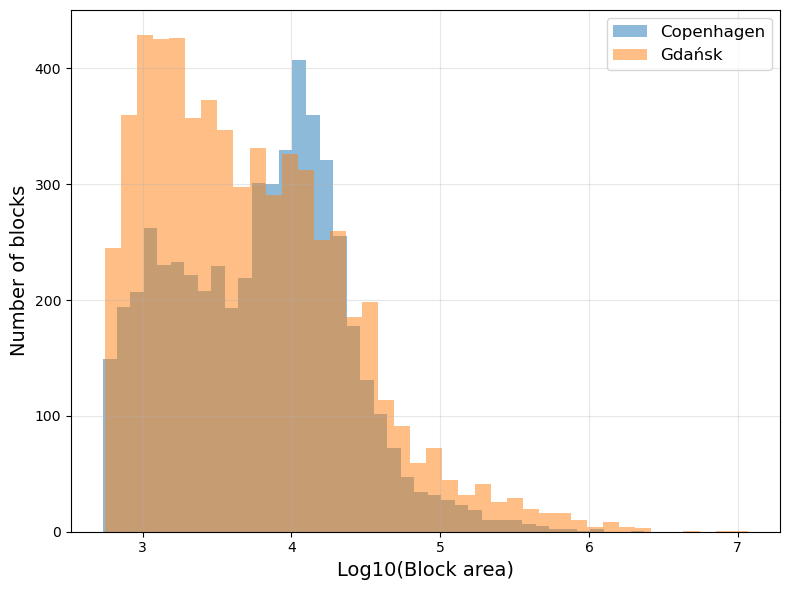

In [12]:
save_path = "report/figures"
os.makedirs(save_path, exist_ok=True)

plt.figure(figsize=(8, 6))
for city, df in blocks_all.groupby("city"):
    plt.hist(np.log10(df["area"]), bins=40, alpha=0.5, label=city)

plt.xlabel("Log10(Block area)", fontsize=14)
plt.ylabel("Number of blocks", fontsize=14)
# plt.title("Distribution of block sizes", fontsize = 14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.savefig(
    os.path.join(save_path, "distribution_blocks.pdf"),
    dpi=300,
    bbox_inches="tight"
)

plt.show()


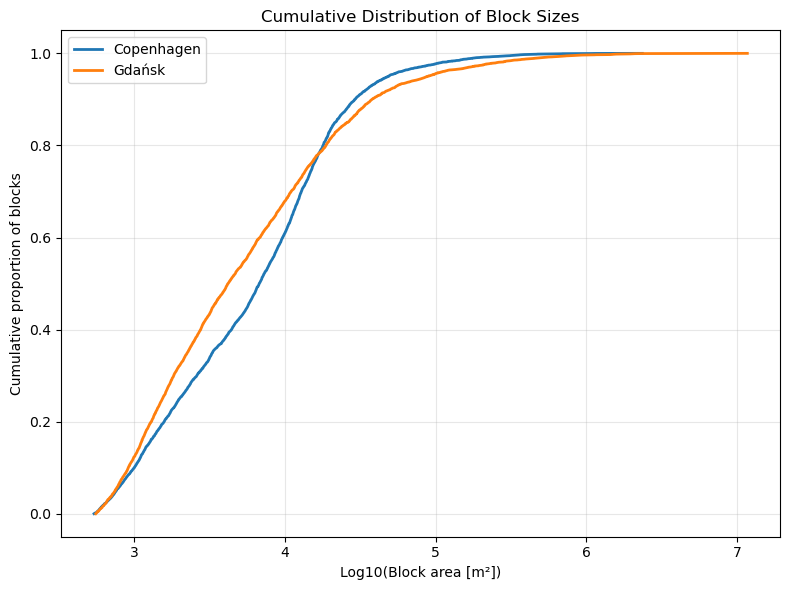

In [13]:
def plot_cdf(data, label):
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    plt.plot(np.log10(x), y, label=label, linewidth=2)

plt.figure(figsize=(8,6))
for city, df in blocks_all.groupby("city"):
    plot_cdf(df["area"], city)

plt.xlabel("Log10(Block area [m²])")
plt.ylabel("Cumulative proportion of blocks")
plt.title("Cumulative Distribution of Block Sizes")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.savefig(f"blocks_sizes_cumulative_distribution", dpi=300)

plt.show()


Z-scores

In [14]:
# Load both datasets
cph_zscores = pd.read_csv("data/processed/Copenhagen_results_z_scores.csv")
gda_zscores = pd.read_csv("data/processed/Gdansk_results_z_scores.csv")

categories = [
    "food", "infrastructure_transport", "education", "culture_leisure",
    "public_services", "healthcare", "retail", "green_spaces", "other_daily_utilities"
]

# Add city labels
cph_zscores["city"] = "Copenhagen"
gda_zscores["city"] = "Gdańsk"

# Combine them into one DataFrame
df_all_zscores = pd.concat([cph_zscores, gda_zscores], ignore_index=True)


In [15]:
print(df_all_zscores.head())
print(df_all_zscores.columns)

                 Unnamed: 0  real_var  mean_rand  std_rand   z_score  \
0                      food  0.310291   0.800925  0.062638 -7.832813   
1                 education  0.369498   0.803777  0.090571 -4.794891   
2              green_spaces  0.533707   0.801277  0.069984 -3.823311   
3  infrastructure_transport  0.405366   0.798913  0.073267 -5.371375   
4     other_daily_utilities  0.393534   0.797269  0.086736 -4.654741   

                                           rand_vars        city  
0  [0.77919794 0.77727052 0.7992364  0.88964109 0...  Copenhagen  
1  [0.81957955 0.70408038 0.73403613 0.74819472 0...  Copenhagen  
2  [0.86270881 0.8263463  0.71580727 0.81113335 0...  Copenhagen  
3  [0.80871714 0.7905828  0.82577176 0.77478115 0...  Copenhagen  
4  [0.72526626 0.72296608 0.73001856 0.77603214 0...  Copenhagen  
Index(['Unnamed: 0', 'real_var', 'mean_rand', 'std_rand', 'z_score',
       'rand_vars', 'city'],
      dtype='object')


In [16]:
cph_zscores

,Unnamed: 0,real_var,mean_rand,std_rand,z_score,rand_vars,city
0,food,0.310291,0.800925,0.062638,-7.832813,[0.77919794 0.77727052 0.7992364 0.88964109 0...,Copenhagen
1,education,0.369498,0.803777,0.090571,-4.794891,[0.81957955 0.70408038 0.73403613 0.74819472 0...,Copenhagen
2,green_spaces,0.533707,0.801277,0.069984,-3.823311,[0.86270881 0.8263463 0.71580727 0.81113335 0...,Copenhagen
3,infrastructure_transport,0.405366,0.798913,0.073267,-5.371375,[0.80871714 0.7905828 0.82577176 0.77478115 0...,Copenhagen
4,other_daily_utilities,0.393534,0.797269,0.086736,-4.654741,[0.72526626 0.72296608 0.73001856 0.77603214 0...,Copenhagen
5,retail,0.276325,0.802711,0.069329,-7.592606,[0.88302554 0.82091538 0.70223542 0.93729677 0...,Copenhagen
6,culture_leisure,0.300649,0.799325,0.084647,-5.891230,[0.79259161 0.79082147 0.73238633 0.74102987 0...,Copenhagen
7,public_services,0.323928,0.805153,0.077967,-6.172146,[0.75681343 0.6736398 0.81044054 1.04848136 0...,Copenhagen
8,healthcare,0.371608,0.800134,0.111627,-3.838917,[0.85401102 0.77604388 0.70769518 0.70617252 0...,Copenhagen


In [17]:
gda_zscores

,Unnamed: 0,real_var,mean_rand,std_rand,z_score,rand_vars,city
0,infrastructure_transport,0.551850,1.386958,0.183052,-4.562126,[1.37855346 1.52150929 1.36093701 1.30346626 1...,Gdańsk
1,culture_leisure,0.262683,1.359728,0.438194,-2.503561,[1.30248797 1.39273191 1.22729382 1.19409366 1...,Gdańsk
2,retail,0.329183,1.387965,0.285940,-3.702817,[1.29092613 1.10203572 1.71225092 2.00207615 1...,Gdańsk
3,other_daily_utilities,0.392009,1.391368,0.184058,-5.429576,[1.34634442 1.50744413 1.36528744 1.69096544 1...,Gdańsk
4,green_spaces,0.330211,1.379666,0.256255,-4.095356,[1.52031485 0.89342349 1.26042776 1.15437608 1...,Gdańsk
5,healthcare,0.348684,1.382548,0.221913,-4.658869,[1.38418334 1.25783823 1.19967874 1.46286039 1...,Gdańsk
6,public_services,0.415796,1.382775,0.221114,-4.373223,[2.02566769 1.51339796 1.04539777 1.28680248 1...,Gdańsk
7,education,0.336063,1.385150,0.249809,-4.199566,[1.35527268 1.05156319 1.24534032 1.25804406 1...,Gdańsk
8,food,0.298408,1.366081,0.360562,-2.961132,[1.04232406 1.15741587 1.11992148 1.26403847 0...,Gdańsk


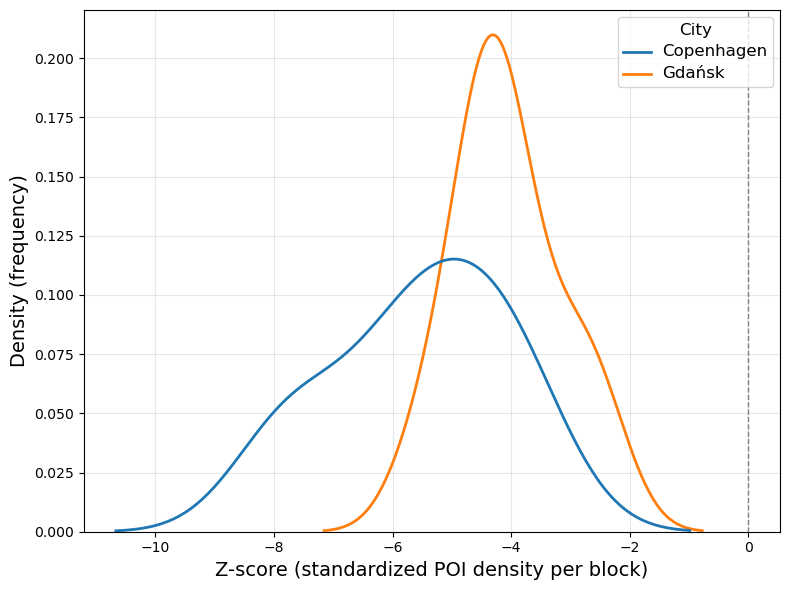

In [18]:
import os

save_path = "report/figures"
os.makedirs(save_path, exist_ok=True)

plt.figure(figsize=(8, 6))
sns.kdeplot(
    data=df_all_zscores,
    x="z_score",
    hue="city",
    linewidth=2
)

plt.xlabel("Z-score (standardized POI density per block)", fontsize=14)
plt.ylabel("Density (frequency)", fontsize=14)
# plt.title("Distribution of Z-scores", fontsize=14)

plt.axvline(0, color="gray", linestyle="--", linewidth=1)
plt.grid(True, alpha=0.3)


# --- Legend styling (same as your GE plot) ---
ax = plt.gca()
leg = ax.get_legend()
leg.set_title("City")
leg.get_title().set_fontsize(12)
for text in leg.get_texts():
    text.set_fontsize(12)
leg.set_loc("upper right")
# --------------------------------------------

plt.tight_layout()

plt.savefig(
    os.path.join(save_path, "distribution_zscores.pdf"),
    format="pdf",
    bbox_inches="tight"
)

plt.show()


In [19]:
# Extract z-scores for each city
cph_z = df_all_zscores[df_all_zscores["city"] == "Copenhagen"]["z_score"].values
gda_z = df_all_zscores[df_all_zscores["city"] == "Gdańsk"]["z_score"].values

# Mann-Whitney U test 
u_z, p_z = mannwhitneyu(cph_z, gda_z)
print("Mann–Whitney (z-scores): U =", u_z, ", p =", p_z)

Mann–Whitney (z-scores): U = 16.0 , p = 0.034069195144143936


In [20]:
summary = df_all_zscores.groupby("city")["z_score"].agg(["mean", "std", "median", "min", "max"])
print(summary.round(3))

             mean    std  median    min    max
city                                          
Copenhagen -5.552  1.466  -5.371 -7.833 -3.823
Gdańsk     -4.054  0.892  -4.200 -5.430 -2.504


Generalized Euclidean

In [21]:
# Load both GE results
cph_ge = pd.read_csv("data/processed/Copenhagen_results_GE.csv")
gda_ge = pd.read_csv("data/processed/Gdansk_results_GE.csv")

# Combine into one DataFrame
df_all_ge = pd.concat([cph_ge, gda_ge], ignore_index=True)

In [22]:
print(df_all_ge.head())
print(df_all_ge.columns)

   infrastructure_transport  culture_leisure    retail  other_daily_utilities  \
0                  0.000000         0.100852  0.083640               0.054924   
1                  0.100852         0.000000  0.095025               0.094875   
2                  0.083640         0.095025  0.000000               0.069788   
3                  0.054924         0.094875  0.069788               0.000000   
4                  0.082467         0.075125  0.069045               0.072517   

   green_spaces  healthcare  public_services  education      food  
0      0.082467    0.081749         0.087801   0.066587  0.124505  
1      0.075125    0.105159         0.067490   0.093163  0.079890  
2      0.069045    0.048408         0.073625   0.058002  0.098524  
3      0.072517    0.073509         0.075017   0.050690  0.118591  
4      0.000000    0.072126         0.052489   0.057790  0.088364  
Index(['infrastructure_transport', 'culture_leisure', 'retail',
       'other_daily_utilities', 'green_sp

In [23]:
print(cph_ge.shape)
print(gda_ge.shape)

(9, 9)
(9, 9)


In [24]:
print(cph_ge.index)

RangeIndex(start=0, stop=9, step=1)


In [25]:
# Set index = columns (since GE is a symmetric square matrix)
cph_ge.index = cph_ge.columns
gda_ge.index = gda_ge.columns

print(cph_ge.index)

Index(['infrastructure_transport', 'culture_leisure', 'retail',
       'other_daily_utilities', 'green_spaces', 'healthcare',
       'public_services', 'education', 'food'],
      dtype='object')


In [26]:
# Extract only upper triangle (no duplicates, no diagonal)
mask_upper = np.triu(np.ones(cph_ge.shape), k=1).astype(bool)
cph_vals = cph_ge.where(mask_upper).stack().reset_index(drop=True)
gda_vals = gda_ge.where(mask_upper).stack().reset_index(drop=True)

# Combine into a single dataframe for plotting
df_all_ge = pd.concat([
    pd.DataFrame({"GE": cph_vals, "city": "Copenhagen"}),
    pd.DataFrame({"GE": gda_vals, "city": "Gdańsk"})
], ignore_index=True)

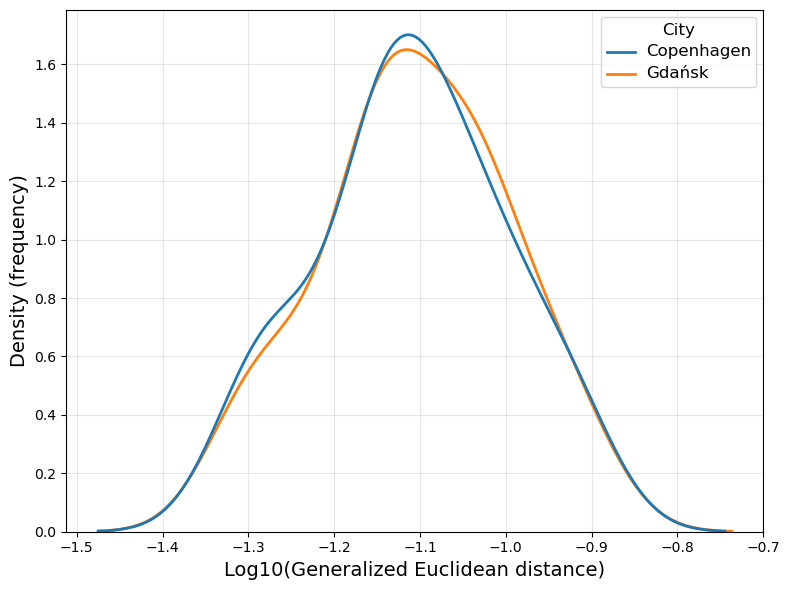

In [27]:
save_path = "report/figures"
os.makedirs(save_path, exist_ok=True)

plt.figure(figsize=(8, 6))
sns.kdeplot(
    data=df_all_ge,
    x=np.log10(df_all_ge["GE"]),
    hue="city",
    linewidth=2
)

plt.xlabel("Log10(Generalized Euclidean distance)", fontsize=14)
plt.ylabel("Density (frequency)", fontsize=14)
plt.grid(True, alpha=0.3)

ax = plt.gca()
leg = ax.get_legend()
leg.set_title("City")
leg.get_title().set_fontsize(12)
for text in leg.get_texts():
    text.set_fontsize(12)
leg.set_loc("upper right")

plt.tight_layout()

plt.savefig(
    os.path.join(save_path, "distribution_ge.pdf"),
    dpi=300,
    bbox_inches="tight"
)

plt.show()


In [28]:
# Mann-Whitney U test
u_ge, p_ge = mannwhitneyu(cph_vals, gda_vals)
print("Mann–Whitney (GE): U =", u_ge, ", p =", p_ge)

Mann–Whitney (GE): U = 639.0 , p = 0.9237354411064371


In [29]:
summary = df_all_ge.groupby("city")["GE"].agg(["mean", "std", "median", "min", "max"])
print(summary.round(4))

              mean     std  median     min     max
city                                              
Copenhagen  0.0802  0.0201  0.0756  0.0484  0.1245
Gdańsk      0.0808  0.0200  0.0748  0.0483  0.1272


In [30]:
categories = list(cph_ge.index)

cph_ge = cph_ge.loc[categories, categories]
gda_ge = gda_ge.loc[categories, categories]

# shared vmin/vmax across both cities
vmin = min(cph_ge.values.min(), gda_ge.values.min())
vmax = max(cph_ge.values.max(), gda_ge.values.max())

In [31]:
order = [
    "food",
    "retail",
    "education",
    "healthcare",
    "infrastructure_transport",
    "culture_leisure",
    "green_spaces",
    "public_services",
    "other_daily_utilities",
]

pretty_labels = [
    "Food",
    "Education",
    "Green\nspaces",
    "Infra.\n& transp.",
    "Other\ndaily util.",
    "Retail",
    "Culture\n& leisure",
    "Public\nservices",
    "Healthcare",
]



In [32]:
import os
import re
from matplotlib import cm, colors

def plot_ge_heatmap_city(
    df_ge,
    city_name=None,
    title="GE distances",
    order=None,
    pretty_labels=None,
    vmin=None,
    vmax=None,
    cmap=cm.OrRd,
    cbar_shrink=0.6,
    save_path=None,
):
    # --- Ordering ---
    if order is not None:
        df_plot = df_ge.loc[order, order]
    else:
        df_plot = df_ge.copy()
        order = list(df_plot.index)

    if pretty_labels is None:
        pretty_labels = order

    # --- Color scaling ---
    if vmin is None:
        vmin = df_plot.values.min()
    if vmax is None:
        vmax = df_plot.values.max()

    # --- Figure ---
    fig, ax = plt.subplots(figsize=(10, 10))

    hm = sns.heatmap(
        df_plot,
        annot=True,
        fmt=".3f",
        annot_kws={"fontsize": 14},
        cmap=cmap,
        vmin=vmin,
        vmax=vmax,
        square=True,
        linewidths=0.4,
        linecolor="white",
        cbar=False,
        ax=ax,
    )

    # --- Colorbar ---
    sm = cm.ScalarMappable(norm=colors.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, shrink=cbar_shrink)
    cbar.ax.tick_params(labelsize=12)
    cbar.ax.set_ylabel("GE distance", fontsize=14, labelpad=10)

    # --- Labels & formatting ---
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticklabels(pretty_labels, rotation=45, ha="right", fontsize=16)
    ax.set_yticklabels(pretty_labels, rotation=0, fontsize=16)

    plt.tight_layout()

    if save_path:
        full_title = f"{city_name.capitalize()} {title}" if city_name else title
        safe_title = re.sub(r"[^a-zA-Z0-9]+", "_", full_title.lower())
        filename = f"{safe_title}.pdf"
        filepath = os.path.join(save_path, filename)
        plt.savefig(filepath, dpi=300, bbox_inches="tight")
        plt.close(fig)
    else:
        return fig, ax

    return fig, ax


In [33]:
plot_ge_heatmap_city(cph_ge, city_name="Copenhagen",
                     order=order, pretty_labels=pretty_labels,
                     vmin=vmin, vmax=vmax, save_path="report/figures")

plot_ge_heatmap_city(gda_ge, city_name="Gdansk",
                     order=order, pretty_labels=pretty_labels,
                     vmin=vmin, vmax=vmax, save_path="report/figures")

(<Figure size 1000x1000 with 2 Axes>, <Axes: >)